# Proyecto Final Parte II: Clasificación-ensambles y presentación ejecutiva

![Logo Tec](img/LogoTec2.jpg)

## Ciencia y analítica de datos (Gpo 10)
### Alumnos: 
* Armando Bringas Corpus (A01200230), 
* Walter André Hauri Rosales (A01794237)

### Profesores: 
* Dra. María de la Paz Rico Fernández
* Mtra. Victoria Guerrero Orozco

### Fecha: 18 de noviembre de 2022

In [ ]:
try:
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context ='notebook', ticks =True, grid =False) 
except ImportError as error:
   print('Not running in a Jupyter Notebook')

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, PrecisionRecallDisplay, confusion_matrix, ConfusionMatrixDisplay

In [25]:
data = pd.read_csv("data/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020_limpio.csv", index_col=0)
data.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,Desconocido,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,Desconocido,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,Desconocido,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,Desconocido,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


### Selecciona tus variables independientes X y dependiente Y (semáforo)

In [26]:
y = data["SEMAFORO"]
X = data.drop(columns=["SEMAFORO"])

In [27]:
X = X.select_dtypes(["float64"])

Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]

In [37]:
colores_semaforo = {'Amarillo': 0, 'Rojo': 1, 'Verde': 2}
y.unique() # Desde la limpieza se convritió a variable categórica

array([1, 2, 0], dtype=int64)

Realiza un análisis general de las features importances a traves de decision trees o random forest.

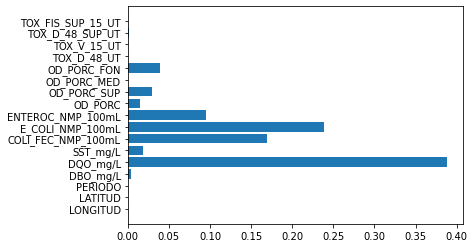

In [29]:
modelo_DT = DecisionTreeClassifier()
clf = modelo_DT.fit(X, y)

plt.barh(X.columns, width = clf.feature_importances_);

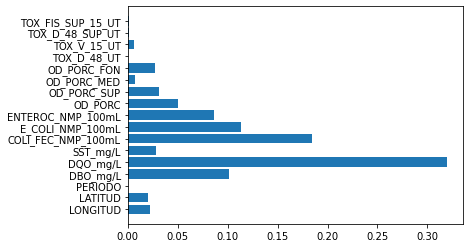

In [30]:
modelo_RF = RandomForestClassifier()
clf = modelo_RF.fit(X, y)

plt.barh(X.columns, width = clf.feature_importances_);

Selecciona las variables de mayor importancia

In [31]:
## TODO

Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, stratify=y)


Explora que clasificador es el más optimo.

Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.

In [41]:
modelo_DT = DecisionTreeClassifier()
clf = modelo_DT.fit(X_train, y_train)

y_hat = modelo_DT.predict(X_test)

print(classification_report(y_test, y_hat, target_names=colores_semaforo))

### Must read this to avid error: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#the-average-precision-score-in-multi-label-settings

display = PrecisionRecallDisplay.from_estimator(modelo_DT, X_test, y_test, name="Decision Tree")
_ = display.ax_.set_title("2-class Precision-Recall curve")

              precision    recall  f1-score   support

    Amarillo       1.00      0.99      1.00       227
        Rojo       1.00      1.00      1.00       218
       Verde       0.99      1.00      0.99       254

    accuracy                           1.00       699
   macro avg       1.00      1.00      1.00       699
weighted avg       1.00      1.00      1.00       699



ValueError: Expected 'estimator' to be a binary classifier, but got DecisionTreeClassifier fit on multiclass (3 classes) data

Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

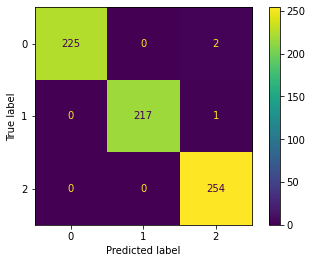

In [54]:
cf_matrix = confusion_matrix(y_test, y_hat)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat);